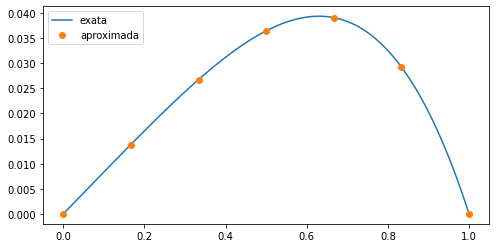

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

def BasisFuncA(x):
    Phi = [x*(x-1), x*(x-0.5)*(x-1), x*(x-1/3)*(x-2/3)*(x-1)]
    GradPhi = [2*x-1, (x-0.5)*(x-1) + x*((x-1) + (x-0.5)),
               (x-1/3)*(x-2/3)*(x-1) + x*((x-2/3)*(x-1) + (x-1/3)*((x-1) + (x-2/3)))]
    return [Phi, GradPhi]

def BasisFuncB(x):
    Phi = [math.sin(math.pi*x), math.sin(2*math.pi*x), math.sin(3*math.pi*x)]
    GradPhi = [math.pi*math.cos(math.pi*x), 2*math.pi*math.cos(2*math.pi*x), 3*math.pi*math.cos(3*math.pi*x)]
    return [Phi, GradPhi]

A_c = np.zeros((3,3))
b_c = np.zeros(3)
A_d = np.zeros((3,3))
b_d = np.zeros(3)

def Aij_c(x):
    [Phi, GradPhi] = BasisFuncA(x)
    return GradPhi[i]*GradPhi[j]
def bi_c(x):
    [Phi, GradPhi] = BasisFuncA(x)
    return x*x*Phi[i]

def Aij_d(x):
    [Phi, GradPhi] = BasisFuncB(x)
    return GradPhi[i]*GradPhi[j]
def bi_d(x):
    [Phi, GradPhi] = BasisFuncB(x)
    return x*x*Phi[i]

for i in range(3):
    for j in range(3):
        A_c[i,j], err = quad(Aij_c, 0, 1)
        A_d[i,j], err = quad(Aij_d, 0, 1)
    b_c[i], er = quad(bi_c, 0, 1)
    b_d[i], er = quad(bi_d, 0, 1)

N = 7
xex = np.linspace(0, 1, N)
fxex_c = np.zeros(N)
fxex_d = np.zeros(N)
RelativeError_c = np.zeros(N)
RelativeError_d = np.zeros(N)

def f(x):
    return (x - x**4)/12

def f_approx_c(x, U):
    ans = 0
    [Phi, GPhi] = BasisFuncA(x)
    for i in range(3):
        ans += U[i]*Phi[i]
    return ans
def f_approx_d(x, U):
    ans = 0
    [Phi, GPhi] = BasisFuncB(x)
    for i in range(3):
        ans += U[i]*Phi[i]
    return ans

A_inv_c = np.linalg.inv(A_c)
U_c = np.dot(A_inv_c, b_c)

A_inv_d = np.linalg.inv(A_d)
U_d = np.dot(A_inv_d, b_d)

er_c = np.zeros(N)
er_d = np.zeros(N)
RelativeError_c = np.zeros(N)
RelativeError_d = np.zeros(N)

x = np.linspace(0,1,100)

for i in range(N):
    fxex_c[i] = f_approx_c(xex[i], U_c)
    fxex_d[i] = f_approx_d(xex[i], U_d)
    if (i != 0 and i != N-1):
        RelativeError_c[i] = 100*abs(f_approx_c(xex[i], U_c) - f(xex[i]))/f(xex[i])
        RelativeError_d[i] = 100*abs(fxex_d[i] - f(xex[i]))/f(xex[i])

plt.figure(figsize=(8, 4))
plt.plot(x, f(x), label = 'exata')
plt.plot(xex, f_approx_c(xex, U_c),'o', label = 'aproximada')
#plt.plot(xex, fxex_d, 'o', label = 'aproximada')

plt.legend(loc='upper left')
plt.show()

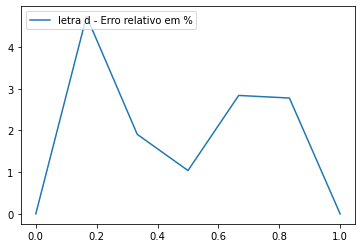

In [8]:
#plt.plot(xex, RelativeError_c, label = 'letra c - Erro relativo em %')
plt.plot(xex, RelativeError_d, label = 'letra d - Erro relativo em %')
plt.legend(loc='upper left')
plt.show()